### **Лабораторная работа №4**
#### *Выполнил: студент группы 8ПМ11, Кайдаров Алибек*

Метод K-средних

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
%matplotlib inline

In [3]:
data = pd.read_csv("D:\Spring_2022\DSandCC\\abalone_data.csv")

In [4]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


19.5, 48
47.5, 49
45, 27.5
60.5, 43
54.5, 39.5

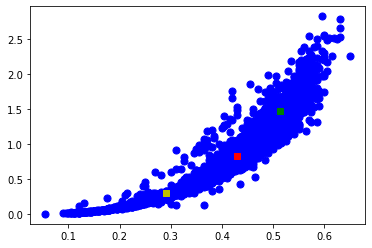

In [5]:
# scaler = MinMaxScaler().fit((data["Annual Income (k$)"].values.reshape(-1, 1)))
# data["Annual Income (k$)"] = scaler.transform(data["Annual Income (k$)"].values.reshape(-1, 1))
# scaler = MinMaxScaler().fit((data["Spending Score (1-100)"].values.reshape(-1, 1)))
# data["Spending Score (1-100)"] = scaler.transform(data["Spending Score (1-100)"].values.reshape(-1, 1))
plt.scatter(data["Diameter"], data["Whole weight"], s = 50, c = "b")
plt.scatter(0.429702, 0.831723,  c="r", marker="s")
plt.scatter(0.51448 ,1.46571,     c="g", marker="s")
plt.scatter(0.290463, 0.294339,     c="y", marker="s")
plt.show()

In [6]:
joined_vars = pd.DataFrame({"Diameter":data["Diameter"], "Whole weight":data["Whole weight"]})
K_mean = KMeans(init="random", n_clusters=3, n_init=20, max_iter=300)
K_mean.fit(joined_vars.to_numpy())

KMeans(init='random', n_clusters=3, n_init=20)

In [7]:
K_mean.cluster_centers_

array([[0.52600386, 1.57996782],
       [0.45027225, 0.95249385],
       [0.31084515, 0.35884249]])

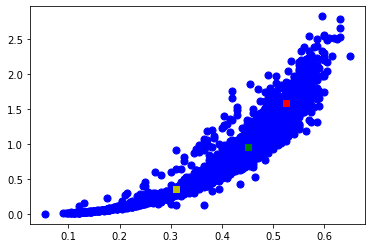

In [8]:
plt.scatter(data["Diameter"], data["Whole weight"], s = 50, c = "b")
plt.scatter(K_mean.cluster_centers_[0][0], K_mean.cluster_centers_[0][1], c="r", marker="s")
plt.scatter(K_mean.cluster_centers_[1][0], K_mean.cluster_centers_[1][1], c="g", marker="s")
plt.scatter(K_mean.cluster_centers_[2][0], K_mean.cluster_centers_[2][1], c="y", marker="s")
plt.show()

In [9]:
kmeans_kwargs = {"init":"random", "n_init":20, "max_iter":300, "random_state":42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(joined_vars.to_numpy())
    sse.append(kmeans.inertia_)

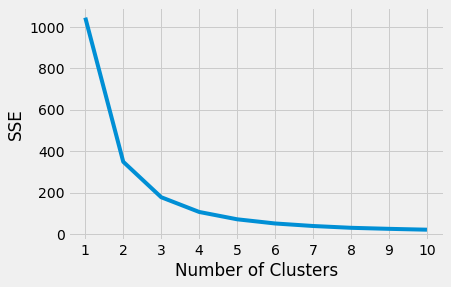

In [10]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [11]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3